naive bayes'


# hand written digit recognition

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import datasets

In [5]:
digit_data= datasets.load_digits()
digit_data

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [6]:
print(digit_data.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [11]:
_image = digit_data.images


In [12]:
_image.shape

(1797, 8, 8)

In [14]:
_image[990]

array([[ 0.,  0.,  6., 14., 13.,  3.,  0.,  0.],
       [ 0.,  0., 12.,  2.,  3., 14.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  8., 13.,  0.,  0.],
       [ 0.,  0.,  0., 12., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  8., 13.,  1.,  0.],
       [ 0.,  1.,  7.,  0.,  0.,  7., 11.,  0.],
       [ 0.,  3., 13.,  2.,  0.,  7., 13.,  0.],
       [ 0.,  0.,  5., 14., 14., 15.,  6.,  0.]])

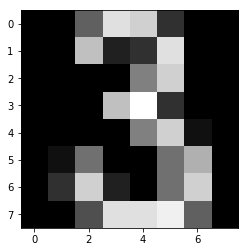

In [36]:
plt.imshow(_image[990],cmap="gray")

In [17]:
x = digit_data.data

In [18]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [19]:
x.shape

(1797, 64)

In [20]:
y = digit_data.target

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4)

In [23]:
x_train.shape

(1078, 64)

In [24]:
x_test.shape

(719, 64)

In [25]:
from sklearn.naive_bayes import GaussianNB

In [26]:
digit_recognizer = GaussianNB()

In [27]:
type(digit_recognizer)

sklearn.naive_bayes.GaussianNB

In [30]:
digit_recognizer.fit(x_train,y_train)

GaussianNB(priors=None)

In [31]:
pred = digit_recognizer.predict(x_test)

In [32]:
pred

array([1, 7, 9, 7, 6, 3, 3, 7, 5, 6, 6, 7, 4, 8, 3, 1, 2, 1, 0, 5, 8, 3,
       7, 0, 4, 3, 5, 0, 8, 6, 7, 6, 2, 6, 3, 6, 7, 3, 8, 5, 9, 7, 5, 1,
       1, 6, 0, 0, 1, 4, 8, 0, 4, 6, 0, 1, 1, 2, 1, 4, 0, 9, 9, 8, 6, 3,
       0, 5, 7, 1, 8, 9, 3, 8, 7, 8, 4, 7, 1, 7, 6, 3, 9, 4, 8, 6, 7, 2,
       5, 0, 0, 7, 1, 7, 5, 2, 6, 8, 3, 8, 8, 7, 1, 5, 4, 3, 5, 7, 8, 0,
       8, 7, 0, 9, 5, 7, 1, 1, 8, 7, 7, 1, 0, 6, 8, 1, 0, 6, 7, 9, 1, 7,
       1, 3, 8, 6, 2, 8, 8, 5, 7, 0, 7, 1, 4, 8, 1, 8, 3, 1, 7, 3, 8, 7,
       0, 0, 3, 7, 6, 7, 1, 8, 0, 2, 5, 5, 1, 7, 2, 6, 5, 1, 4, 6, 8, 9,
       5, 8, 1, 2, 2, 9, 0, 6, 9, 7, 4, 6, 0, 4, 9, 3, 3, 3, 0, 8, 7, 8,
       8, 7, 1, 1, 8, 7, 3, 4, 6, 8, 8, 8, 8, 8, 1, 0, 3, 7, 3, 3, 0, 8,
       0, 9, 6, 1, 6, 6, 0, 3, 7, 5, 5, 8, 5, 9, 4, 1, 1, 9, 3, 1, 9, 2,
       9, 4, 9, 0, 6, 1, 9, 3, 3, 5, 0, 4, 0, 8, 5, 4, 9, 8, 7, 0, 1, 8,
       3, 2, 1, 8, 4, 7, 6, 7, 4, 2, 7, 6, 3, 6, 0, 5, 5, 8, 6, 9, 1, 6,
       0, 1, 4, 7, 8, 7, 4, 1, 2, 8, 5, 4, 5, 8, 7,

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
confusion_matrix(y_test,pred)

array([[68,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0, 71,  0,  0,  0,  0,  0,  1,  6,  1],
       [ 0,  8, 36,  1,  0,  0,  0,  0, 26,  0],
       [ 0,  1,  1, 52,  0,  1,  0,  3,  6,  1],
       [ 1,  5,  0,  0, 51,  0,  3,  5,  2,  0],
       [ 0,  0,  0,  1,  0, 63,  2,  2,  2,  0],
       [ 0,  0,  0,  0,  0,  0, 71,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 77,  0,  0],
       [ 0,  7,  0,  1,  0,  0,  0,  1, 62,  0],
       [ 1,  4,  1, 10,  1,  2,  0,  8,  9, 43]], dtype=int64)

In [44]:
c_pred = 68+71+36+52+51+63+71+77+62+43

In [45]:
c_pred/y_test.size*100

82.61474269819193

In [50]:
digit_recognizer.score(x_test,y_test)*100

82.61474269819193

In [51]:
bool_val=(pred==y_test)
bool_val

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True, False,
        True,  True, False,  True, False,  True,  True, False, False,
       False,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,